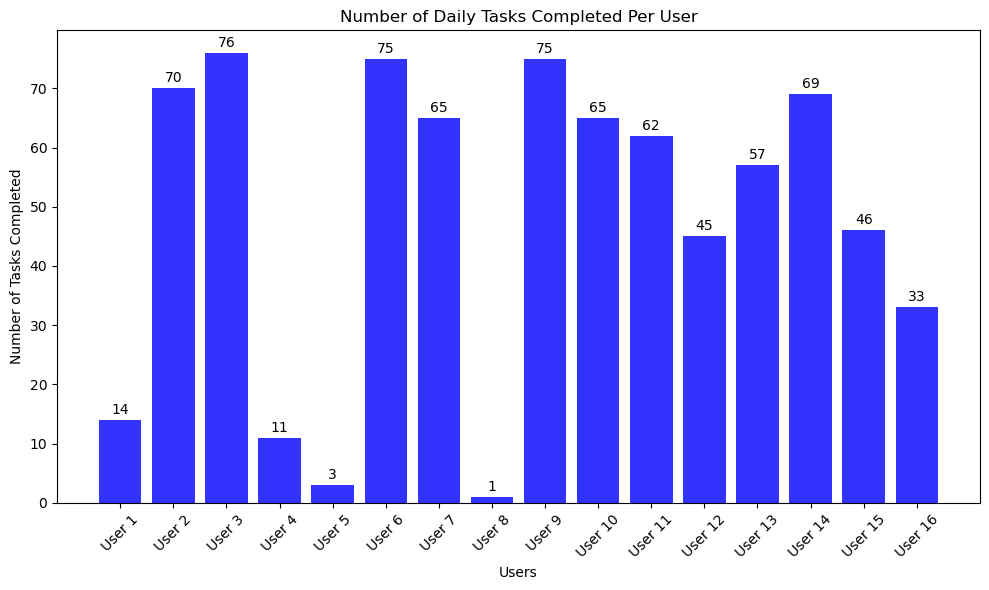

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV
df = pd.read_csv("./TSDA8-daily-data-filtered.csv")

# Load the constant data to get the user order
constant_df = pd.read_csv("./TSDA8-constant-data.csv")
ordered_rids = constant_df["rID"].tolist()

# Filter only users present in the constant file and preserve order
df = df[df["rID"].isin(ordered_rids)]
unique_rids = pd.Series(ordered_rids)[pd.Series(ordered_rids).isin(df["rID"].unique())]

# Count how many entries (daily tasks) each user has, in the order of constant file
task_counts = df.groupby("rID").size().reindex(unique_rids).reset_index()
task_counts.columns = ["rID", "TaskCount"]

# Label users as User 1, User 2, ... (based on constant file order)
task_counts["UserLabel"] = [f"User {i+1}" for i in range(len(task_counts))]

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(
    task_counts["UserLabel"], task_counts["TaskCount"], color="blue", alpha=0.8
)
plt.xlabel("Users")
plt.ylabel("Number of Tasks Completed")
plt.title("Number of Daily Tasks Completed Per User")
plt.xticks(rotation=45)

# Add count labels on each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.5,
        str(int(height)),
        ha="center",
        va="bottom",
    )

plt.tight_layout()
plt.show()

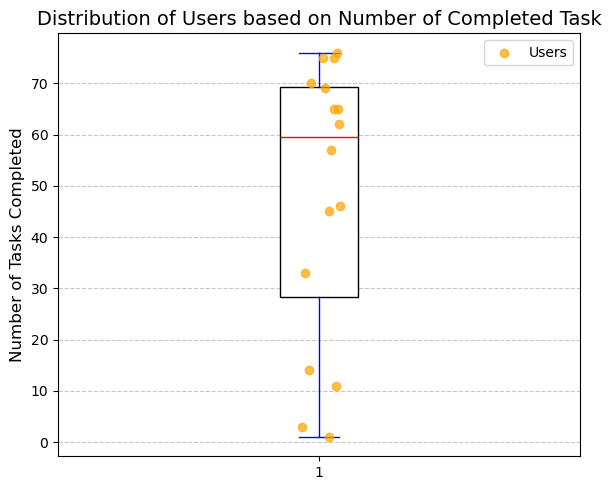

In [19]:
# Box plot to show distribution of task counts per user
plt.figure(figsize=(6, 5))
plt.boxplot(
    task_counts["TaskCount"],
    patch_artist=True,
    boxprops=dict(facecolor="white", color="black"),
    medianprops=dict(color="red"),
    whiskerprops=dict(color="blue"),
    capprops=dict(color="blue"),
    flierprops=dict(marker="o", color="blue", alpha=0.5),
)

# Add individual data points with jitter
for i, value in enumerate(task_counts["TaskCount"], start=1):
    jitter = np.random.uniform(-0.05, 0.05)  # Add jitter to the x-coordinate
    plt.scatter(
        [1 + jitter],  # Apply jitter to the single box position
        value,
        color="orange",
        alpha=0.7,
        zorder=3,  # Ensure points are drawn on top of the box
        label="Users" if i == 1 else "",  # Add label only once
    )

# Add titles and labels
plt.title("Distribution of Users based on Number of Completed Task", fontsize=14)
plt.ylabel("Number of Tasks Completed", fontsize=12)
# Remove the X-axis label as it is unnecessary
plt.xlabel("")

# Add legend
plt.legend(loc="upper right", fontsize=10)

plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()